In [1]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path

epochs = 20

In [2]:
#Naive Bayes (baseline)

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold
import os
from sklearn.metrics import accuracy_score
import pandas as pd
import sys

file_path = '/home/ubuntu/data/autopsy/data.csv'


data = pd.read_csv(file_path,
                          header=None, encoding='ISO-8859-1',
                          names=['label', 'text'])

data = data.loc[data['label'].isin(['Suicide','Homicide'])]
data.label = pd.Categorical(data.label)
data['label_code'] = data.label.cat.codes


X = data['text'].values

Y = data['label_code'].values
print(Y)
print(data['label'].values)

kfold_splits = 5
kf = StratifiedKFold(n_splits=kfold_splits, shuffle=True, random_state=42)

history = []
for index, (train_indices, test_indices) in enumerate(kf.split(data['text'],data['label'])):
  xtrain, xtest = X[train_indices], X[test_indices]
  ytrain, ytest = Y[train_indices], Y[test_indices]


  vectorizer = CountVectorizer(stop_words='english')
  
  train_features = vectorizer.fit_transform(xtrain)
  test_features = vectorizer.transform(xtest)
  

  nb = MultinomialNB()
  nb.fit(train_features, ytrain)


  predictions = nb.predict(test_features)
  accuracy = accuracy_score(ytest,predictions)
  history.append(accuracy)
  print (accuracy)
print(history)

sum = 0.0
for acc in history:
  sum = sum + acc
print ('average accuracy:', (sum/(kfold_splits)))

[1 1 0 0 ... 1 1 1 1]
[Suicide, Suicide, Homicide, Homicide, Suicide, ..., Homicide, Suicide, Suicide, Suicide, Suicide]
Length: 1293
Categories (2, object): [Homicide, Suicide]
0.8416988416988417
0.8262548262548263
0.8532818532818532
0.8841698841698842
0.8365758754863813
[0.8416988416988417, 0.8262548262548263, 0.8532818532818532, 0.8841698841698842, 0.8365758754863813]
average accuracy: 0.8483962561783572


In [4]:
#Basic RNN LSTM (baseline)

In [5]:
''' 
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.python.keras.layers import Input, LSTM, Bidirectional, Dense, Embedding, Dropout, SpatialDropout1D, GRU
from keras import optimizers
import sys

from sklearn.model_selection import StratifiedKFold

import pandas as pd
import re
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import KFold
import os

file_path = '/home/ubuntu/data/autopsy/data.csv'


data = pd.read_csv(file_path,
                          header=None, encoding='ISO-8859-1',
                          names=['label', 'text'])

data = data.loc[data['label'].isin(['Suicide','Homicide'])]
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)
Y = pd.get_dummies(data['label']).values

print(Y.shape)
print(X.shape)



maxlen = X.shape[1]
embedding_size=300
batch_size = 32
lstm_out = 196

def make_model(batch_size=None):
  source = Input(shape=(maxlen,), batch_size=batch_size, dtype=tf.int32, name='Input')
  embedding = Embedding(input_dim=max_features, output_dim=embedding_size, input_length = X.shape[1],name='Embedding')(source)
  drop = SpatialDropout1D(0.5)(embedding)
  #rnn =  Bidirectional(LSTM(lstm_out, name = 'LSTM',dropout=0.50, recurrent_dropout=0.50))(drop)
  rnn =  LSTM(lstm_out, name = 'LSTM',dropout=0.40, recurrent_dropout=0.40)(drop)
  predicted_var = Dense(2, activation='sigmoid', name='Output')(rnn)
  model = tf.keras.Model(inputs=[source], outputs=[predicted_var])
  model.compile(
      optimizer='adam',
      #optimizer=tf.keras.optimizers.RMSprop(decay=1e-3),
      loss = 'categorical_crossentropy',
      metrics=['acc'])
  return model

history_list = []

eval_history_list = []

kfold_splits = 5
kf = KFold(n_splits=kfold_splits, shuffle=True)

for index, (train_indices, val_indices) in enumerate(kf.split(data['text'],data['label'])):
  xtrain, xval = X[train_indices], X[val_indices]
  ytrain, yval = Y[train_indices], Y[val_indices]
  
  tf.keras.backend.clear_session()
  training_model = None
  #training_model = make_model(batch_size = batch_size)
  training_model = make_model()
  
  
  history = training_model.fit(xtrain, ytrain,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(xval,yval))
  
  history_list.append(history)

  accuracy_history = history.history['acc']
  val_accuracy_history = history.history['val_acc']
  print ("Last training accuracy: " + str(accuracy_history[-1]) + ", last validation accuracy: " + str(val_accuracy_history[-1]) )
  
  eval_history = training_model.evaluate(xval, yval, batch_size=batch_size)
  eval_history_list.append(eval_history[1])

  print ("Evaluate:")
  print(eval_history)
 
sum = 0.0
for h in history_list:
  val_accuracy_history = h.history['val_acc']
  final_val_accuracy = val_accuracy_history[-1]
  sum = sum + final_val_accuracy

print('')
print(eval_history_list)
print('')
print("average accuracy:", (sum/(kfold_splits)))

'''


' \nimport tensorflow as tf\nfrom tensorflow.keras.preprocessing import sequence\nfrom tensorflow.python.keras.layers import Input, LSTM, Bidirectional, Dense, Embedding, Dropout, SpatialDropout1D, GRU\nfrom keras import optimizers\nimport sys\n\nfrom sklearn.model_selection import StratifiedKFold\n\nimport pandas as pd\nimport re\nfrom keras.preprocessing.text import Tokenizer\nfrom tensorflow.keras.preprocessing import sequence\nfrom keras.preprocessing.sequence import pad_sequences\nfrom sklearn.model_selection import train_test_split\nfrom keras.utils.np_utils import to_categorical\n\nfrom sklearn.model_selection import KFold\nimport os\n\nfile_path = \'/home/ubuntu/data/autopsy/data.csv\'\n\n\ndata = pd.read_csv(file_path,\n                          header=None, encoding=\'ISO-8859-1\',\n                          names=[\'label\', \'text\'])\n\ndata = data.loc[data[\'label\'].isin([\'Suicide\',\'Homicide\'])]\nmax_features = 2000\ntokenizer = Tokenizer(num_words=max_features, spli

In [6]:
#Simple RNN using an AWD LSTM activation (trained from scratch)

In [7]:
#Parameter setting 1

In [8]:
path_clas = Path('/home/ubuntu/data/autopsy')

batch_size=32

drop_mult=0.1
learning_rate= slice(1e-5,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  data_clas = TextClasDataBunch.from_csv(path_clas,f, max_vocab=2000, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
    
  learner_list.append(learn)

  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds  ))



Accuracy List
[0.8996139168739319, 0.9189189076423645, 0.9073359370231628, 0.8918918967247009, 0.9034749269485474]

Average Accuracy


TypeError: 'numpy.float64' object is not callable

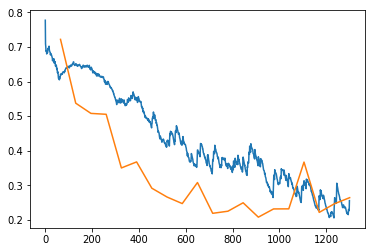

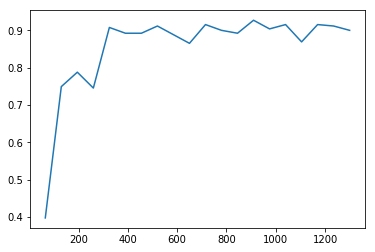

In [9]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

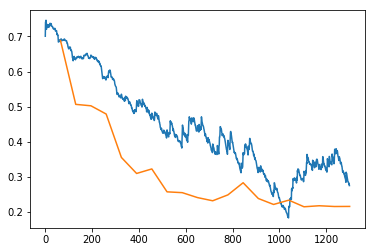

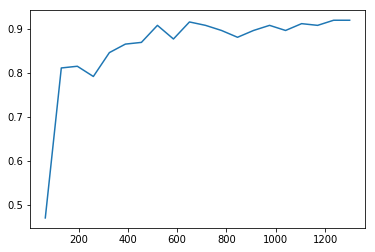

In [10]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

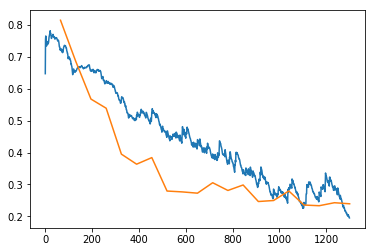

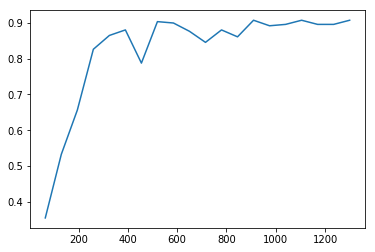

In [11]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

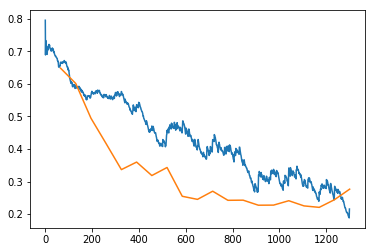

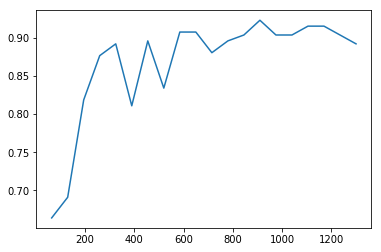

In [12]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

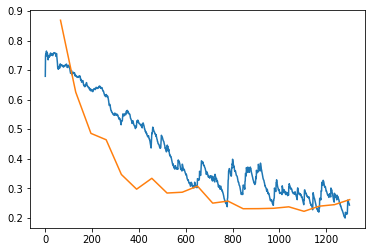

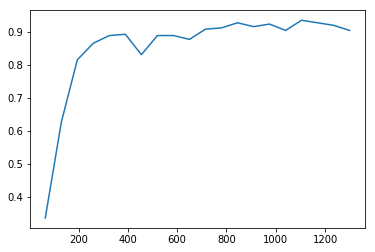

In [13]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [14]:
#Parameter setting 2

In [15]:
path_clas = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.5
learning_rate= slice(1e-5,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  data_clas = TextClasDataBunch.from_csv(path_clas,f, max_vocab=2000, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
    
  learner_list.append(learn)

  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds ))



Accuracy List
[0.7837837934494019, 0.84555983543396, 0.84555983543396, 0.837837815284729, 0.7876448035240173]

Average Accuracy


TypeError: 'numpy.float64' object is not callable

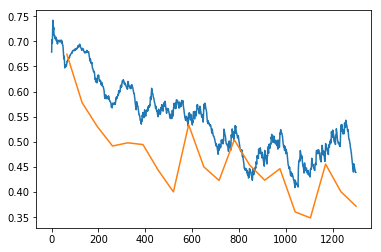

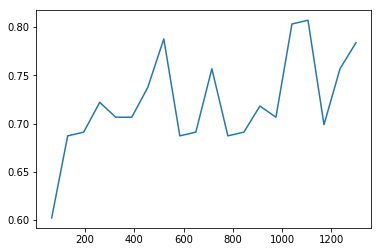

In [16]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

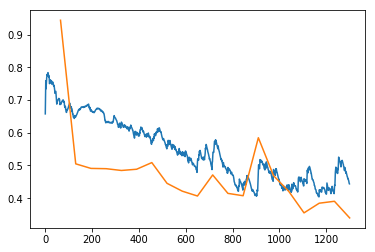

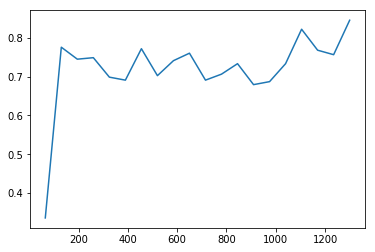

In [17]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

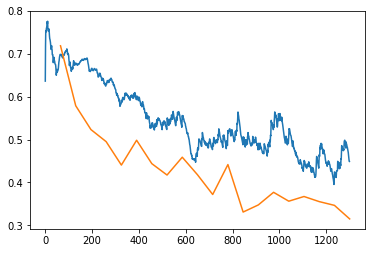

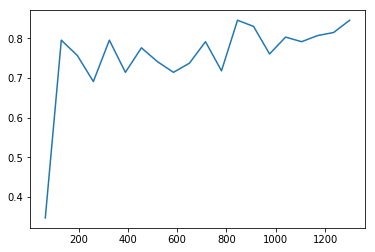

In [18]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

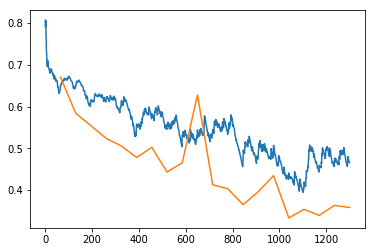

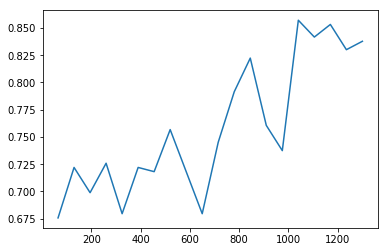

In [19]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

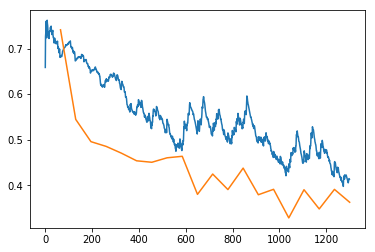

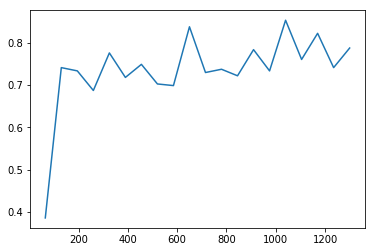

In [20]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [21]:
#Parameter setting 3

In [22]:
path_clas = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate= slice(1e-4,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  data_clas = TextClasDataBunch.from_csv(path_clas,f, max_vocab=2000, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
    
  learner_list.append(learn)

  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds  ))



Accuracy List
[0.915057897567749, 0.8803088665008545, 0.9266409277915955, 0.9111968874931335, 0.9189189076423645]

Average Accuracy


TypeError: 'numpy.float64' object is not callable

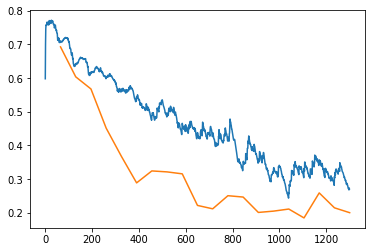

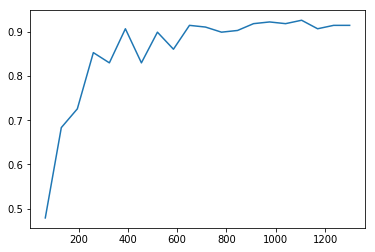

In [23]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

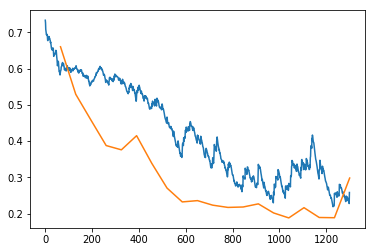

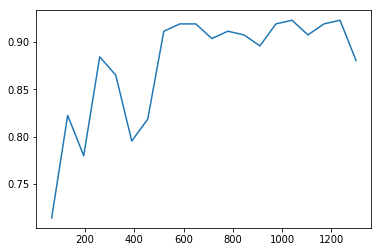

In [24]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

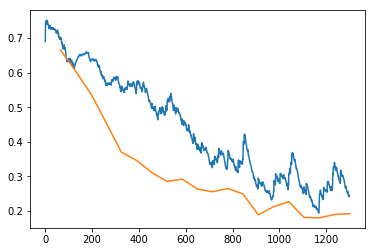

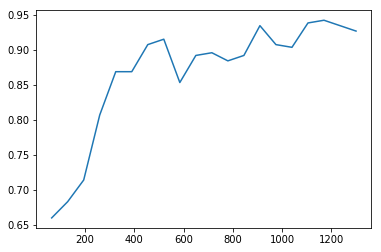

In [25]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

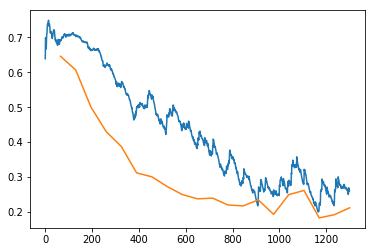

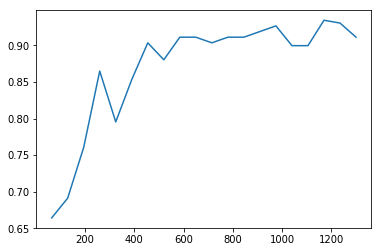

In [26]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

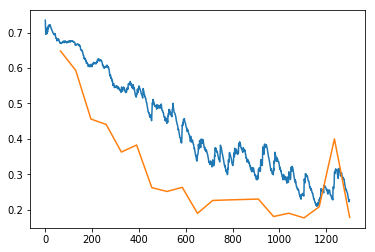

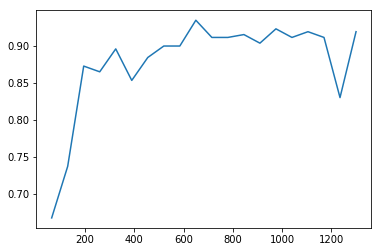

In [27]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [28]:
#Parameter setting 4

In [29]:
path_clas = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate= slice(1e-4,1e-2)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  data_clas = TextClasDataBunch.from_csv(path_clas,f, max_vocab=2000, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
    
  learner_list.append(learn)

  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds  ))


ValueError: too many values to unpack (expected 2)

In [30]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

IndexError: list index out of range

In [31]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

IndexError: list index out of range

In [32]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

IndexError: list index out of range

In [33]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

IndexError: list index out of range

In [34]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

IndexError: list index out of range

In [35]:
#Large RNN using an AWD LSTM activation (trained from scratch)

In [36]:
#Parameter setting 1

In [37]:
path_clas = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.1
learning_rate= slice(1e-5,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  data_clas = TextClasDataBunch.from_csv(path_clas,f, classes=['Suicide','Homicide'],bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds))


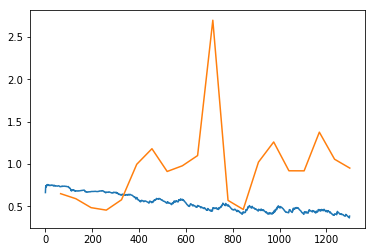

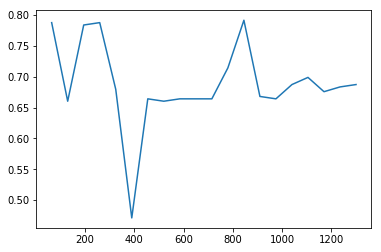

In [38]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

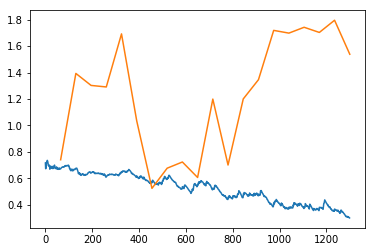

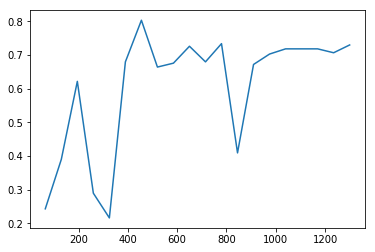

In [39]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

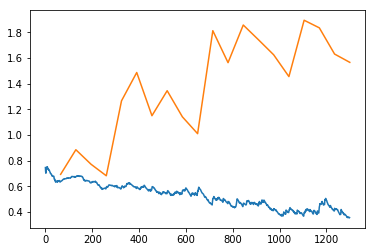

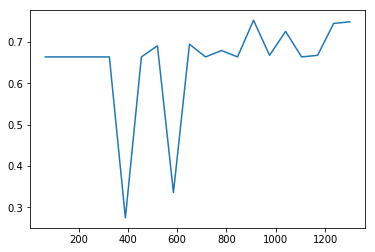

In [40]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

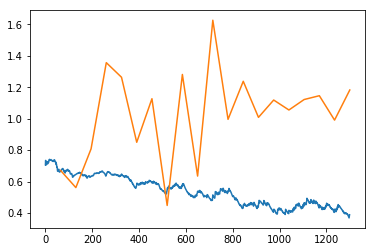

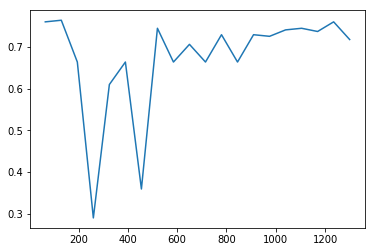

In [41]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

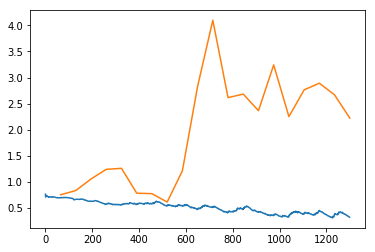

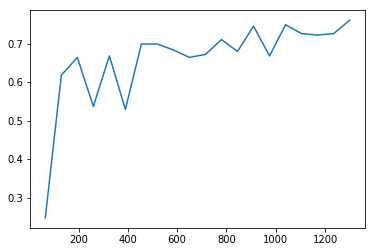

In [42]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [43]:
#Parameter setting 2

In [44]:
path_clas = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.5
learning_rate= slice(1e-5,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  data_clas = TextClasDataBunch.from_csv(path_clas,f, classes=['Suicide','Homicide'],bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds))


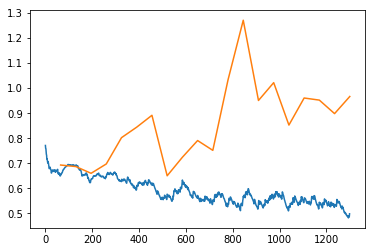

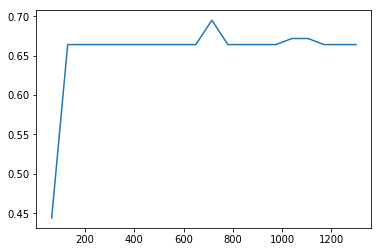

In [45]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

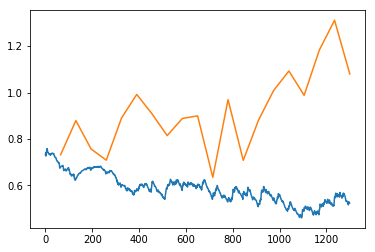

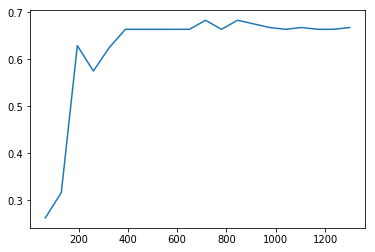

In [46]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

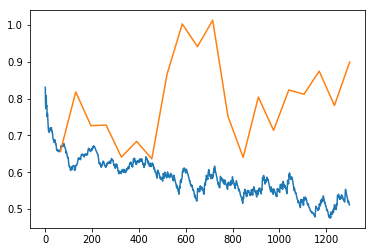

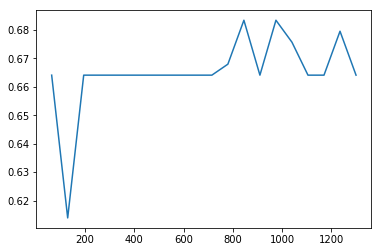

In [47]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

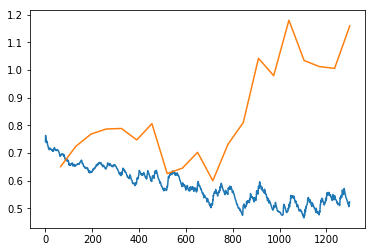

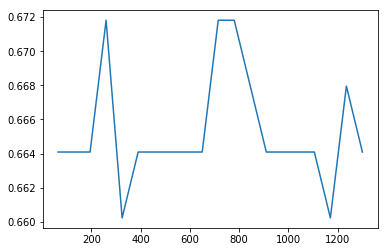

In [48]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

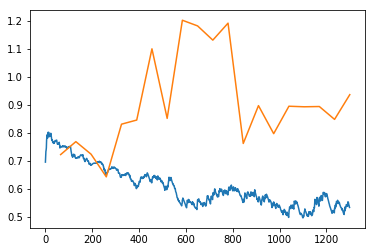

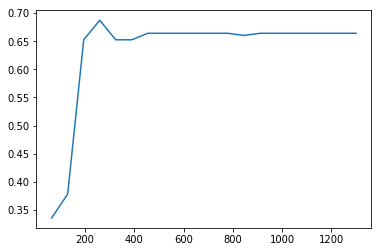

In [49]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [50]:
#Parameter setting 3

In [51]:
path_clas = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate= slice(1e-4,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  data_clas = TextClasDataBunch.from_csv(path_clas,f, classes=['Suicide','Homicide'],bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds))


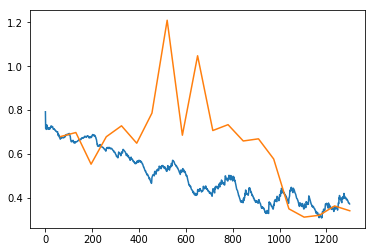

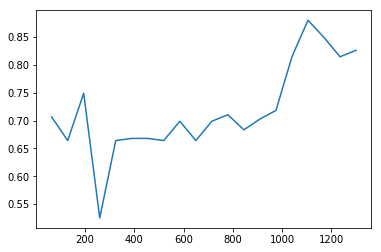

In [52]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

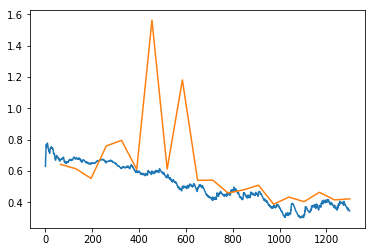

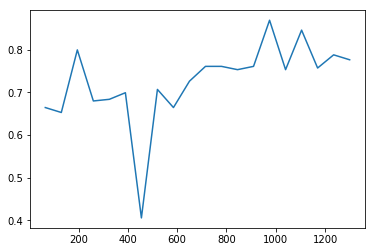

In [53]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

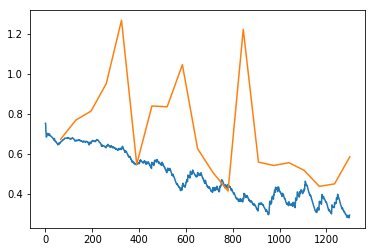

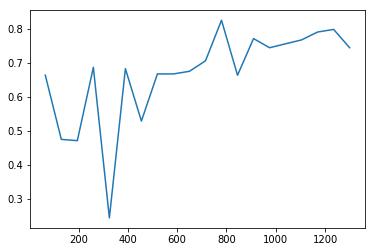

In [54]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

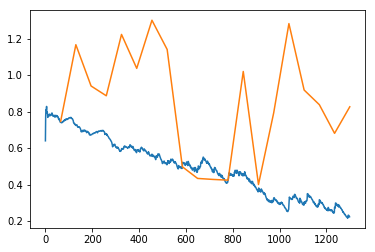

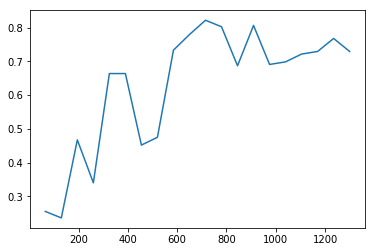

In [55]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

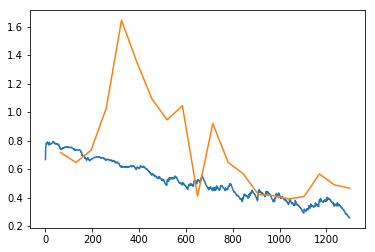

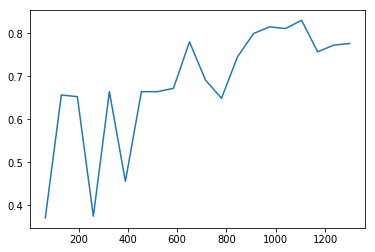

In [56]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [57]:
#Parameter setting 4

In [58]:
path_clas = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate= slice(1e-4,1e-2)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  data_clas = TextClasDataBunch.from_csv(path_clas,f, classes=['Suicide','Homicide'],bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds))


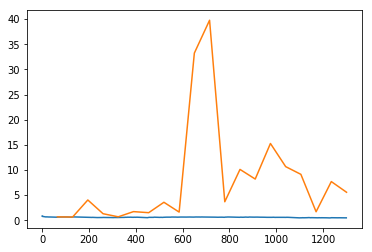

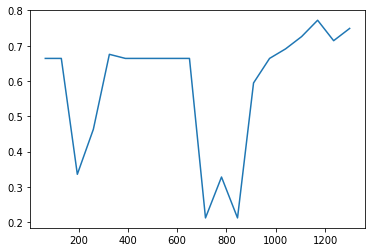

In [59]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

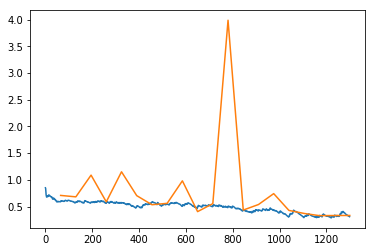

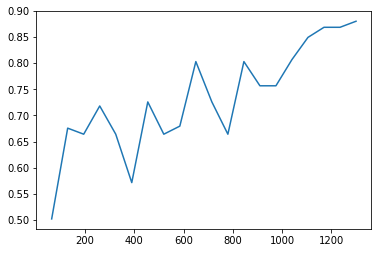

In [60]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

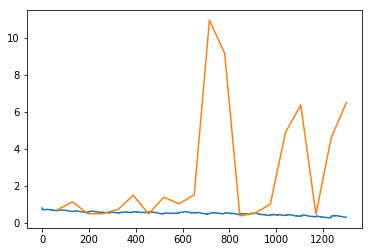

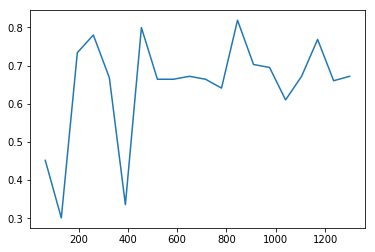

In [61]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

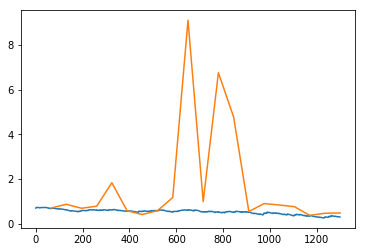

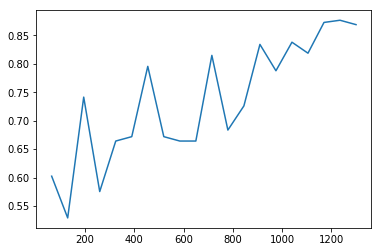

In [62]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

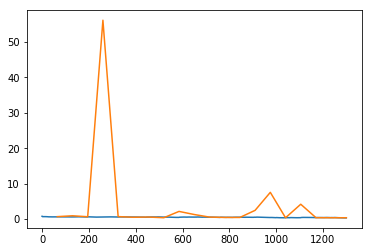

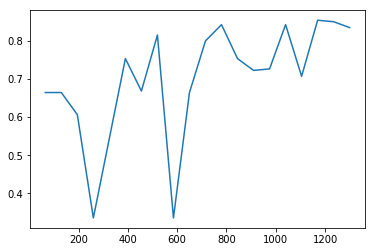

In [63]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [64]:
#Large RNN using an AWD LSTM activation (pretrained with WikiText)

In [65]:
#Parameter setting 1

In [66]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.1
learning_rate= slice(1e-5,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['Suicide','Homicide'])
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_autopsy_only_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds ))


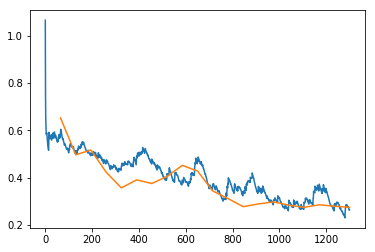

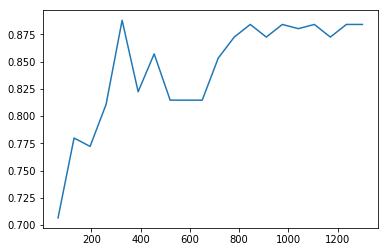

In [67]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

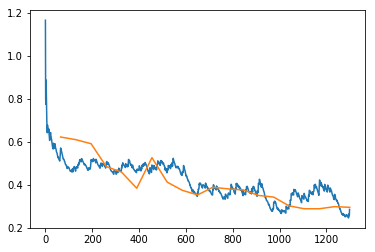

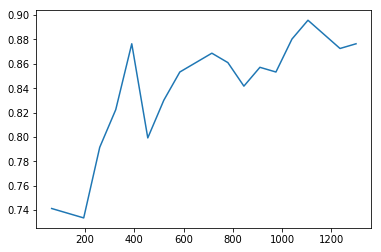

In [68]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

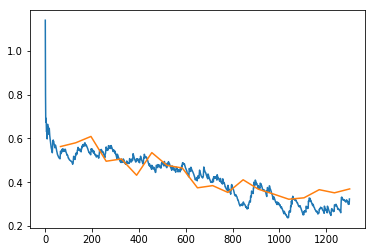

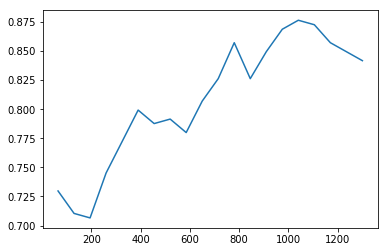

In [69]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

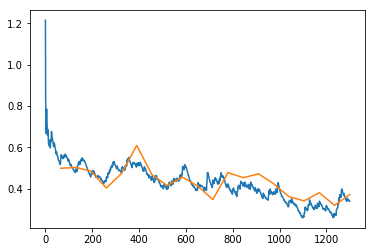

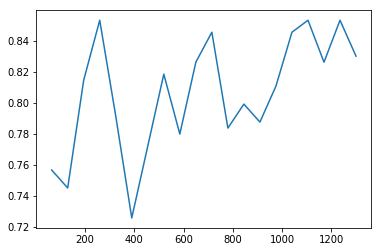

In [70]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

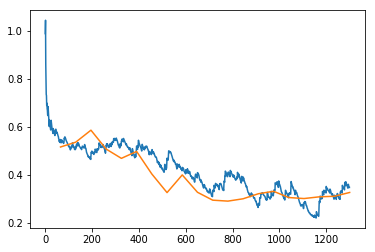

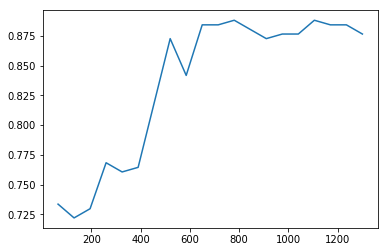

In [71]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [72]:
#Parameter setting 2

In [73]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.5
learning_rate= slice(1e-5,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['Suicide','Homicide'])
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_autopsy_only_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds ))


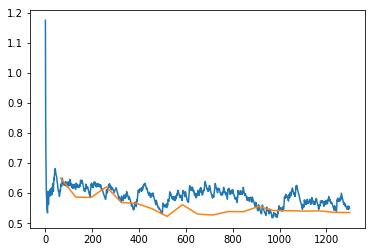

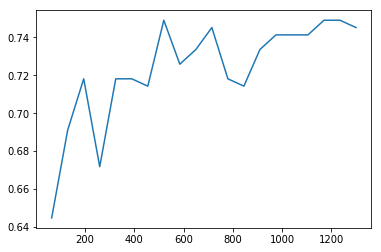

In [74]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

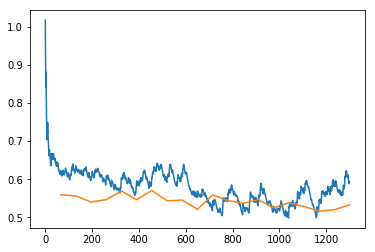

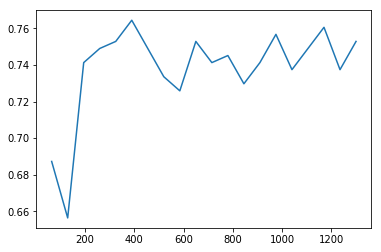

In [75]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

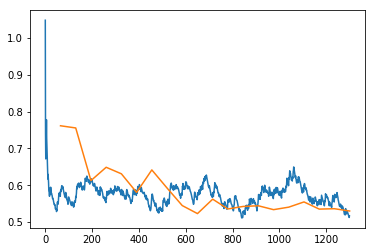

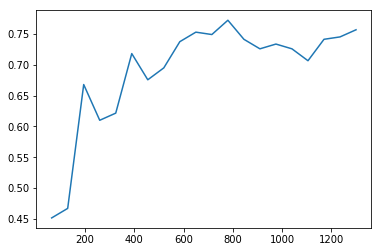

In [76]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

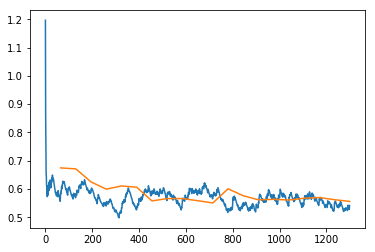

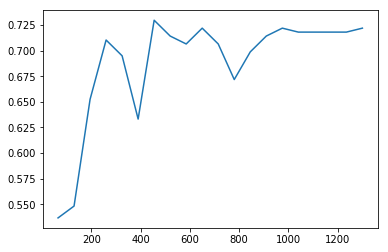

In [77]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

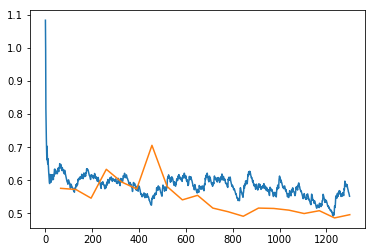

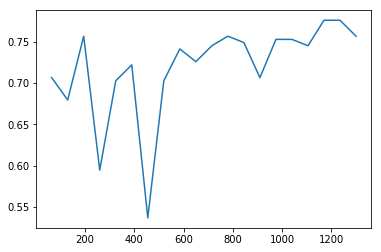

In [78]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [79]:
#Parameter setting 3

In [80]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate= slice(1e-4,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['Suicide','Homicide'])
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_autopsy_only_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds ))


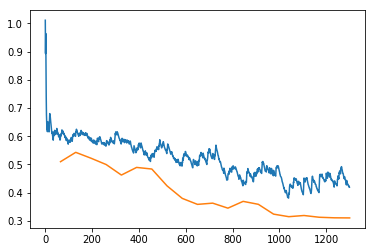

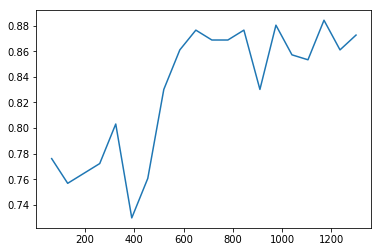

In [81]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

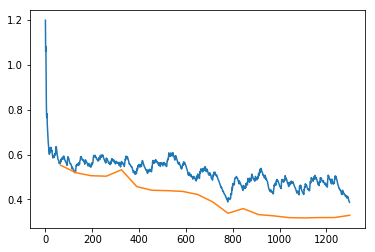

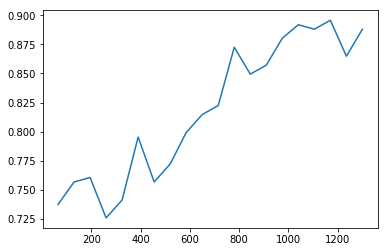

In [82]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

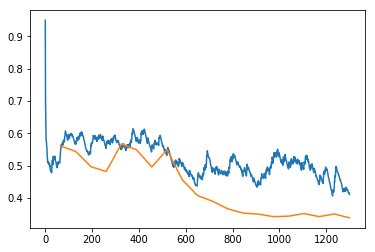

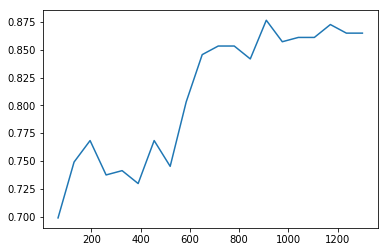

In [83]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

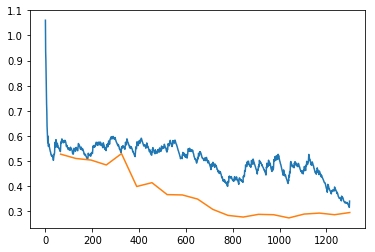

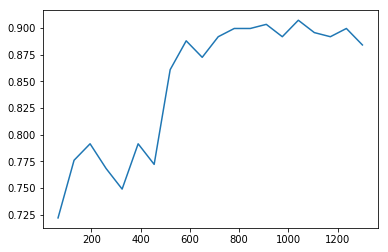

In [84]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

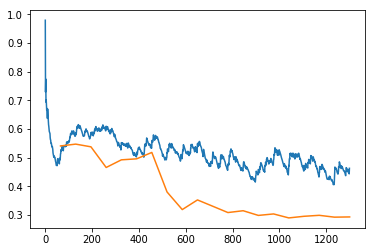

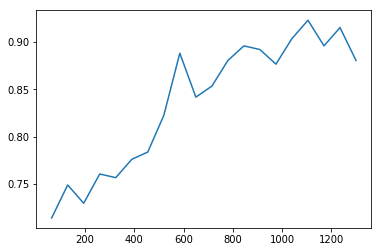

In [85]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [86]:
#Parameter setting 4

In [87]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate= slice(1e-4,1e-2)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['Suicide','Homicide'])
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_autopsy_only_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds ))


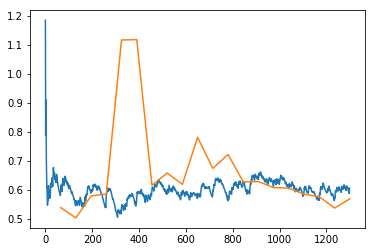

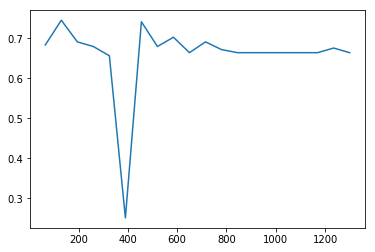

In [88]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

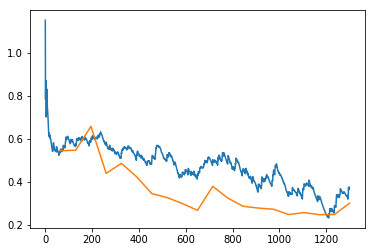

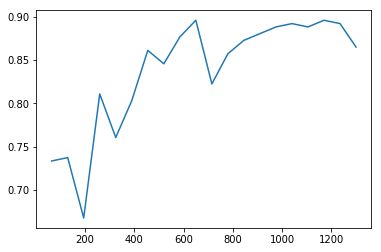

In [89]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

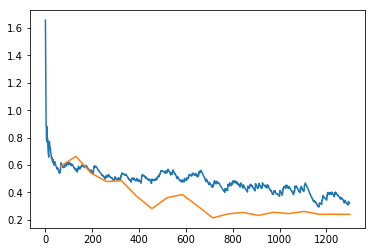

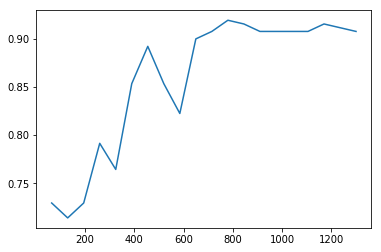

In [90]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

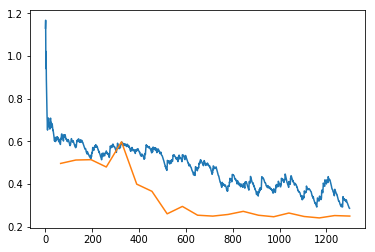

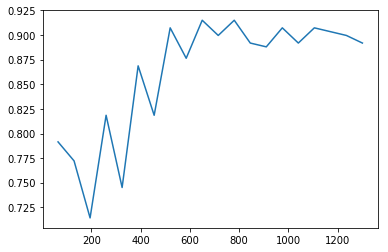

In [91]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

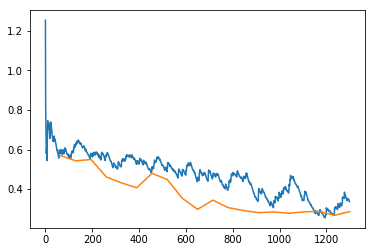

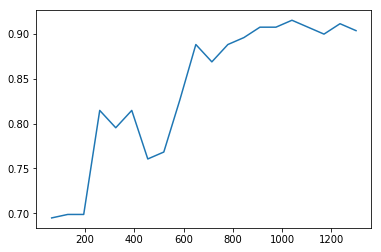

In [92]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [93]:
#Large RNN using an AWD LSTM activation (finetuned with the autopsy data)

In [94]:
#Parameter settings 1

In [95]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.1
learning_rate= slice(1e-5,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []

i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])
for f in folds:
  i = i + 1
  
  #data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])

  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_autopsy_not_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds ))


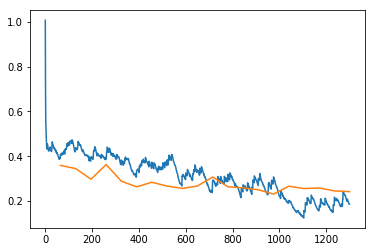

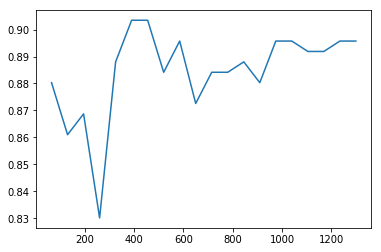

In [96]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

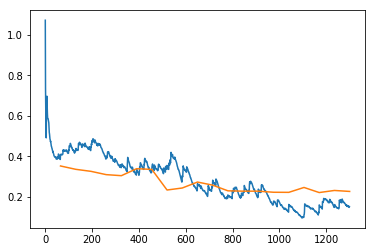

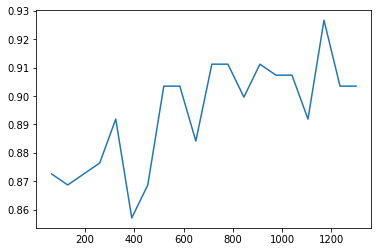

In [97]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

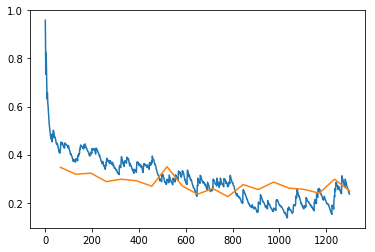

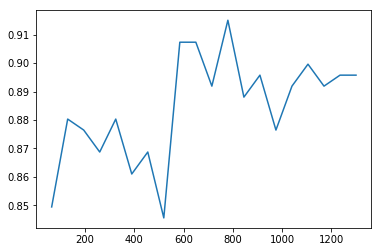

In [98]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

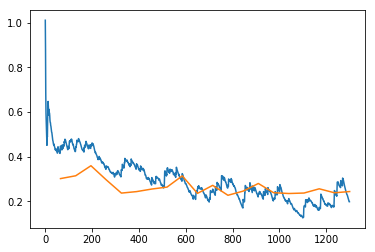

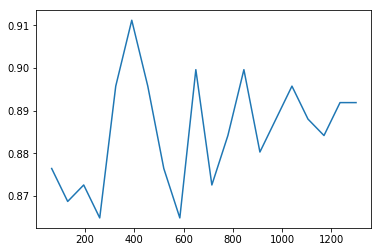

In [99]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

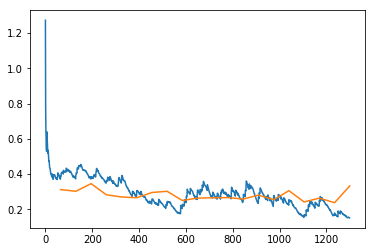

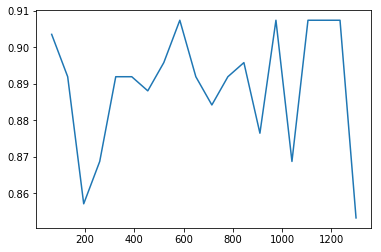

In [100]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [101]:
#Parameter settings 2

In [102]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.5
learning_rate= slice(1e-5,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []

i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])
for f in folds:
  i = i + 1
  
  #data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])

  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_autopsy_not_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds ))


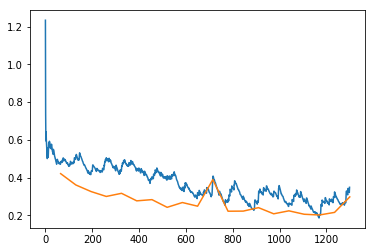

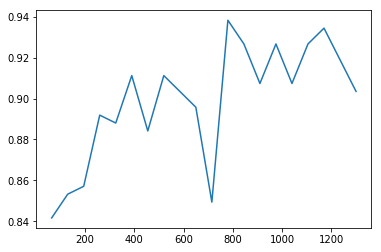

In [103]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

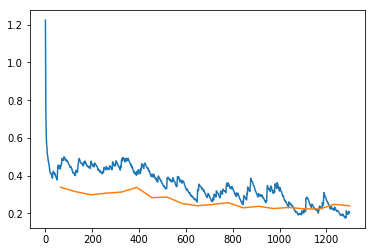

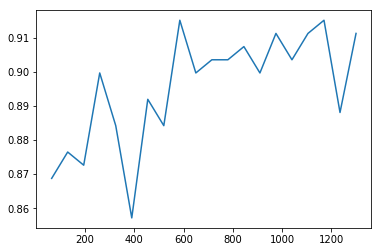

In [104]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

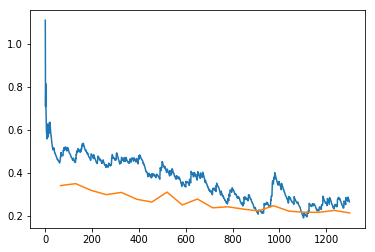

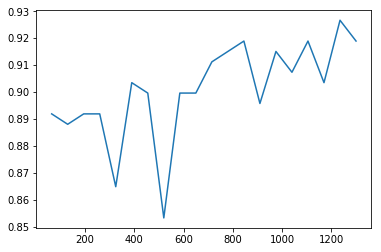

In [105]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

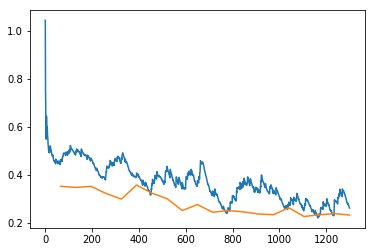

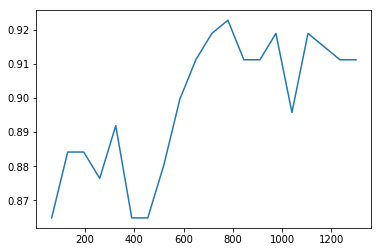

In [106]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

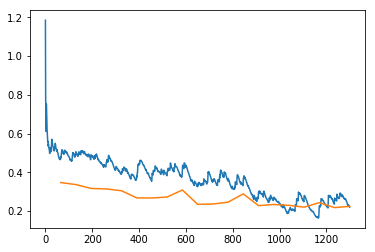

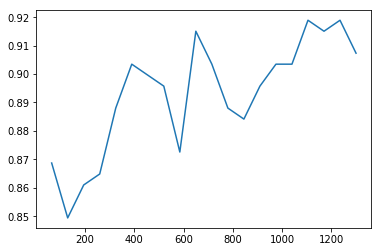

In [107]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [108]:
#Parameter settings 3

In [109]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate= slice(1e-4,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []

i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])
for f in folds:
  i = i + 1
  
  #data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])

  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_autopsy_not_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds ))


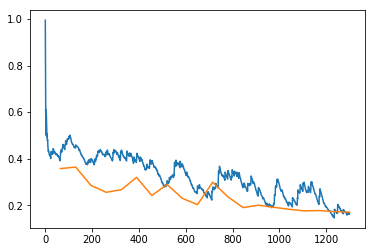

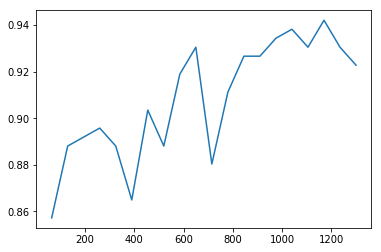

In [110]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

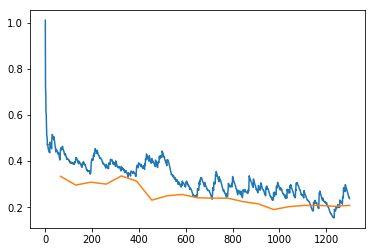

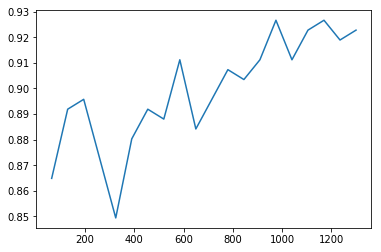

In [111]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

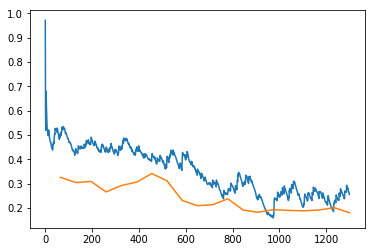

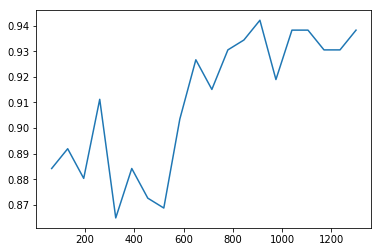

In [112]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

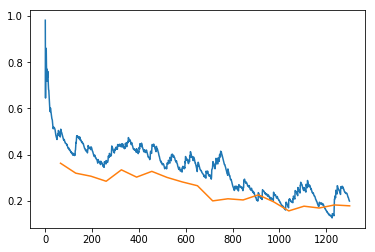

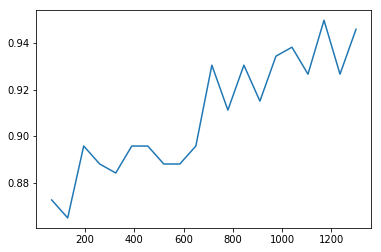

In [113]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

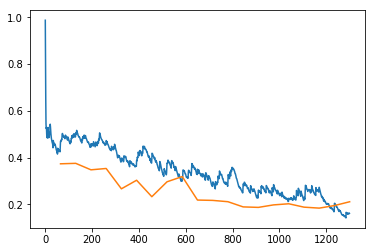

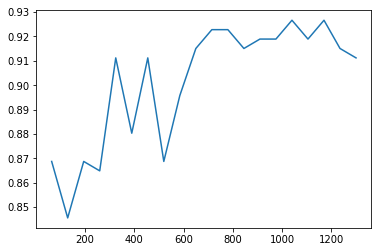

In [114]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [115]:
#Parameter settings 4

In [116]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate= slice(1e-4,1e-2)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []

i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])
for f in folds:
  i = i + 1
  
  #data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])

  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_autopsy_not_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds ))


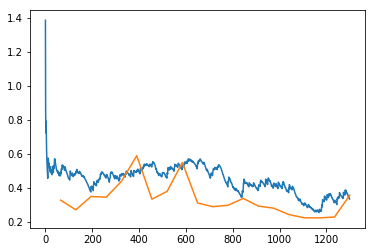

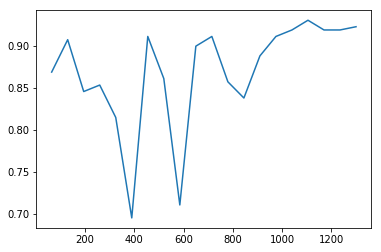

In [117]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

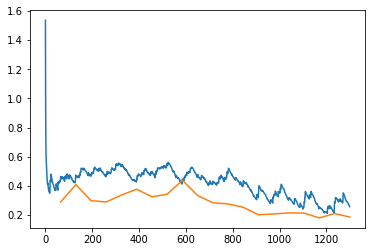

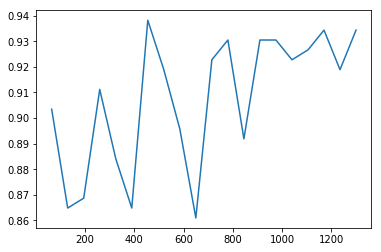

In [118]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

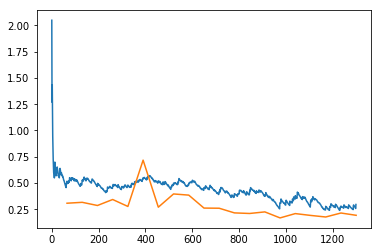

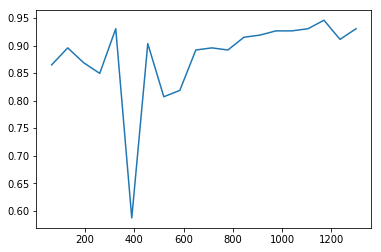

In [119]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

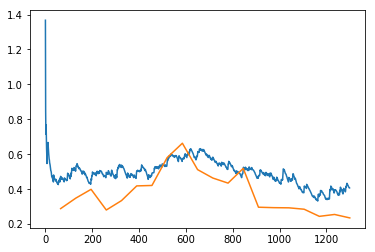

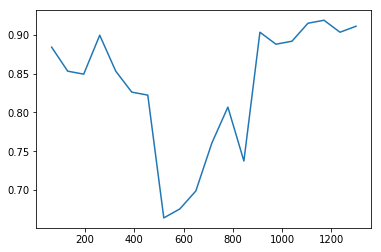

In [120]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

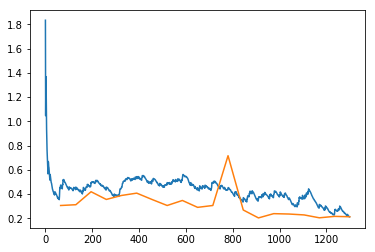

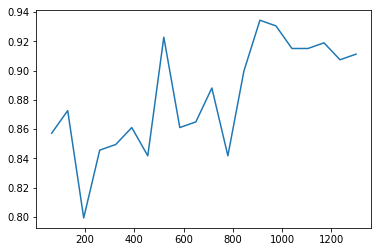

In [121]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [122]:
#Large RNN using an AWD LSTM activation (finetuned with the Nidia27k data)

In [123]:
#Parameter settings 1

In [124]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.1
learning_rate=slice(1e-5,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['Suicide','Homicide'])
  #data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_nidia_not_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  
  learner_list.append(learn)  
    
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds ))

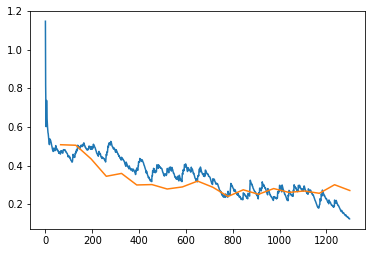

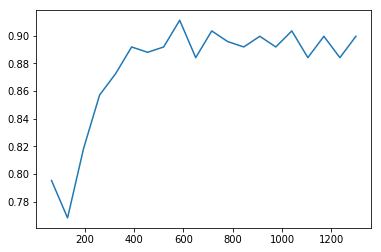

In [125]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

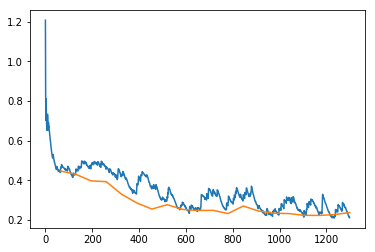

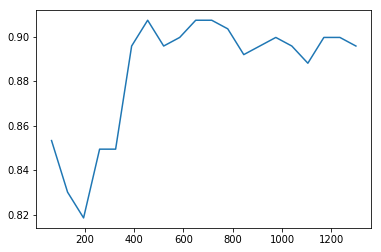

In [126]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

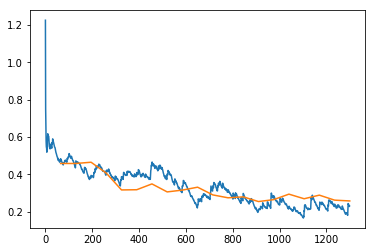

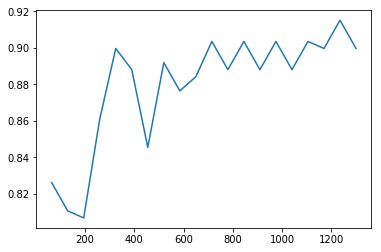

In [127]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

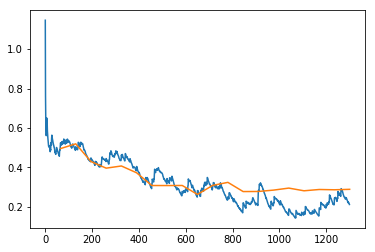

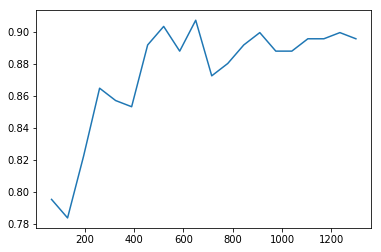

In [128]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

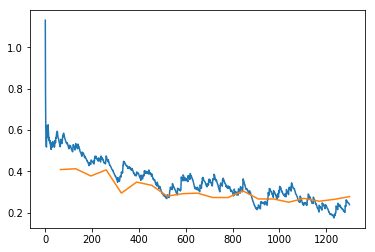

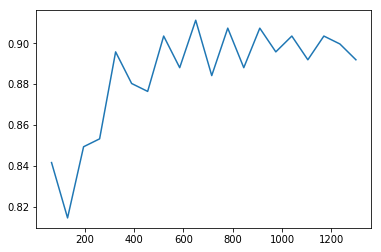

In [129]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [130]:
#Parameter settings 2

In [131]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.5
learning_rate=slice(1e-5,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['Suicide','Homicide'])
  #data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_nidia_not_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  
  learner_list.append(learn)  
    
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds ))

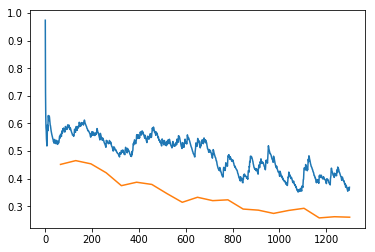

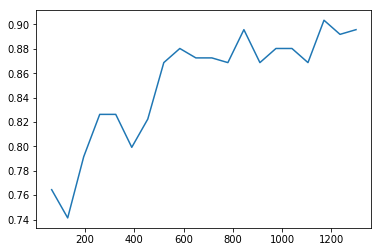

In [132]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

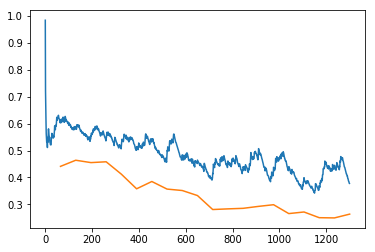

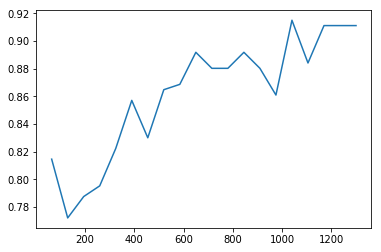

In [133]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

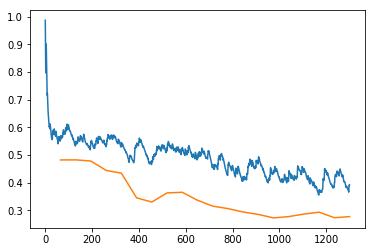

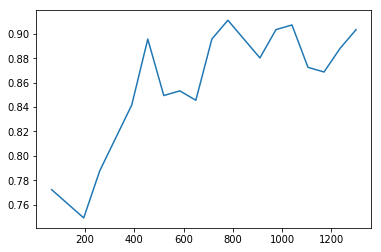

In [134]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

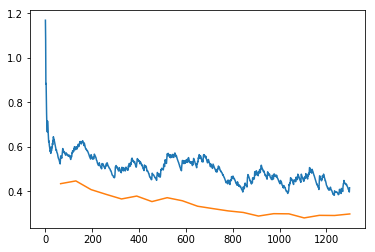

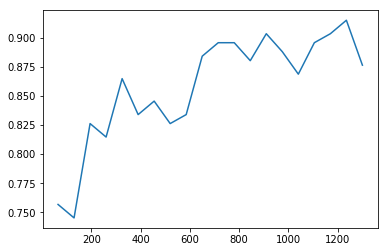

In [135]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

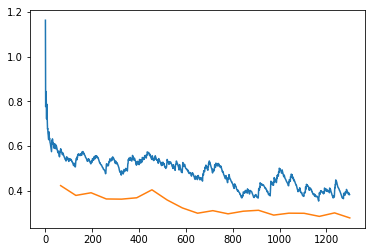

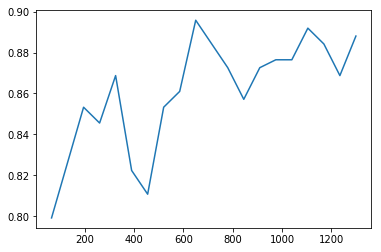

In [136]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [137]:
#Parameter settings 3

In [138]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.3
learning_rate=slice(1e-4,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['Suicide','Homicide'])
  #data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_nidia_not_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  
  learner_list.append(learn)  
    
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds ))

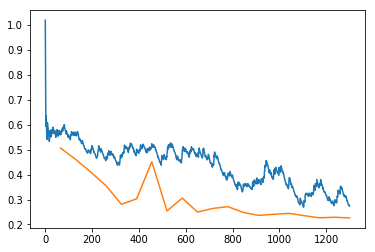

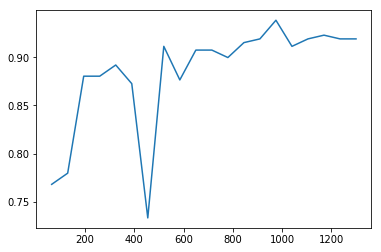

In [139]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

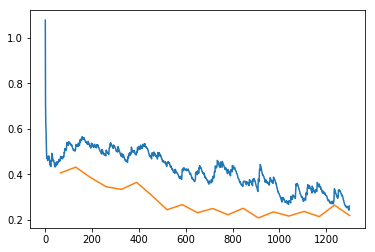

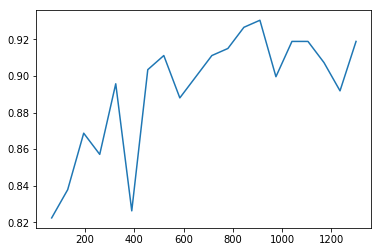

In [140]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

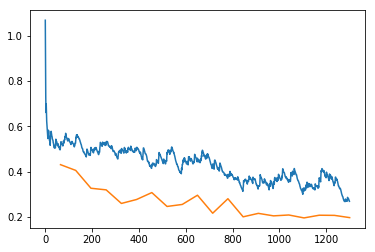

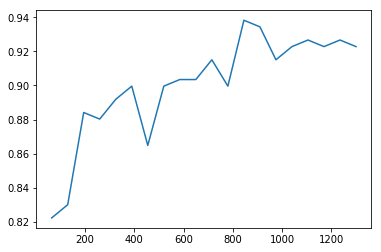

In [141]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

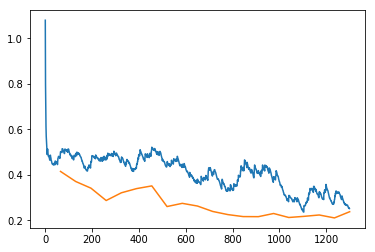

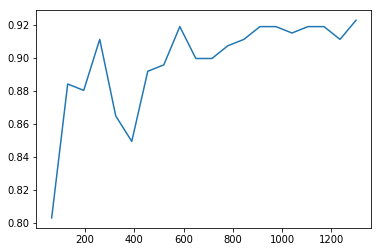

In [142]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

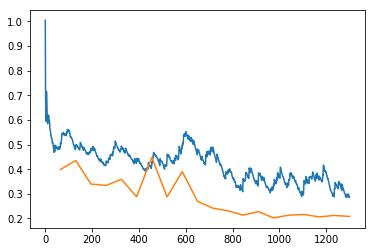

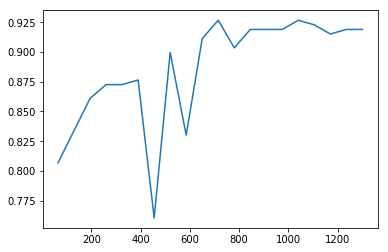

In [143]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [144]:
#Parameter settings 4

In [145]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.3
learning_rate=slice(1e-4,1e-2)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['Suicide','Homicide'])
  #data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_nidia_not_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  
  learner_list.append(learn)  
    
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (float(num_folds)  ))

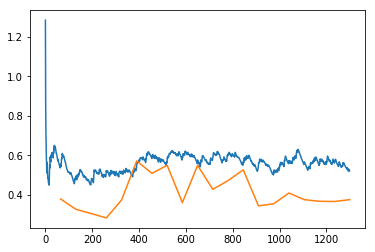

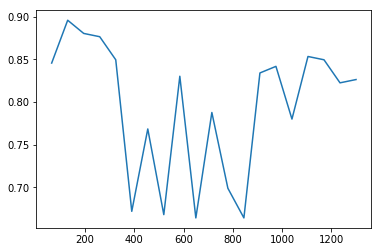

In [146]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

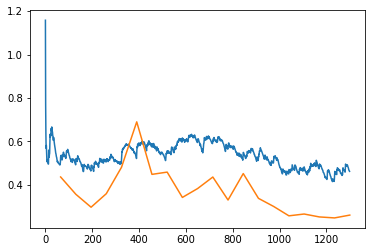

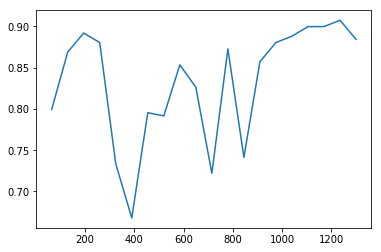

In [147]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

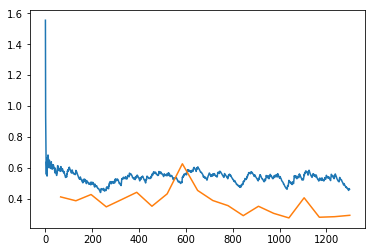

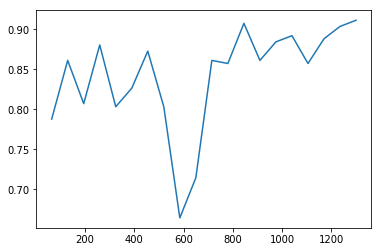

In [148]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

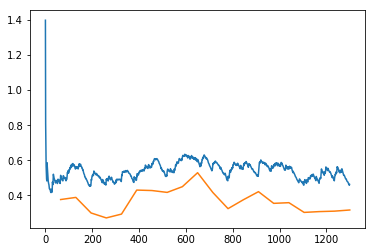

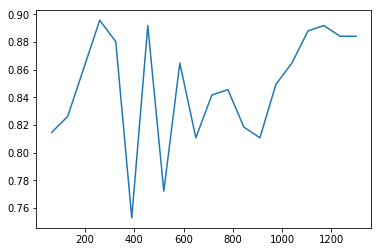

In [149]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

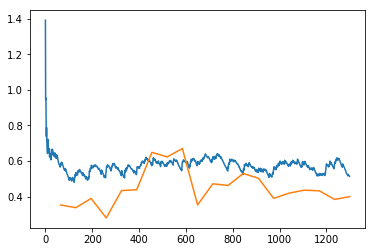

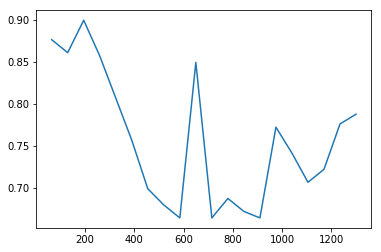

In [150]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [151]:
#Large RNN using an AWD LSTM activation (pretrained with WikiText and finetuned with the autopsy data)

In [152]:
#Parameter settings 1

In [153]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.1
learning_rate=slice(1e-5,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['Suicide','Homicide'])
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_autopsy_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ num_folds  ))


SyntaxError: invalid syntax (<ipython-input-153-6f89b2cf3695>, line 37)

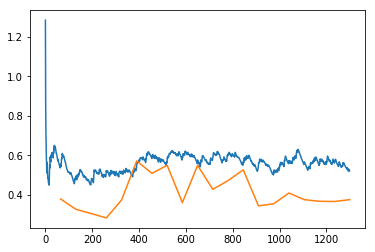

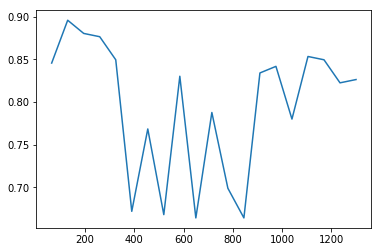

In [154]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

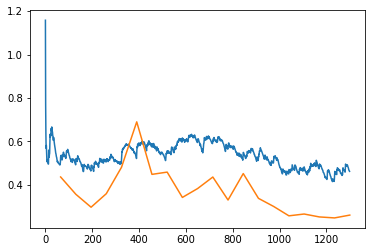

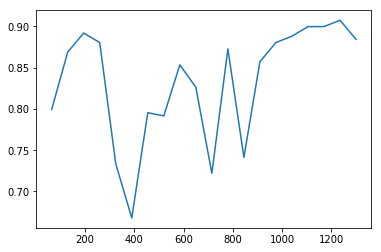

In [155]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

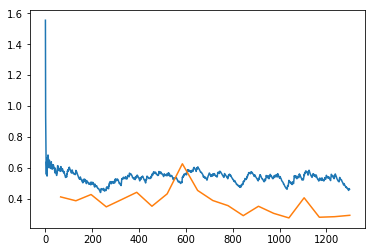

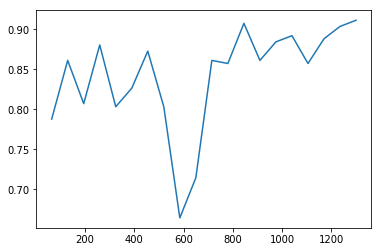

In [156]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

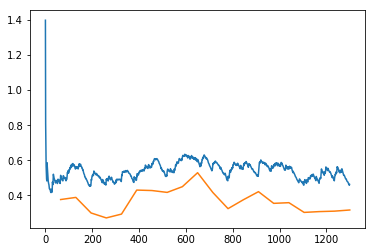

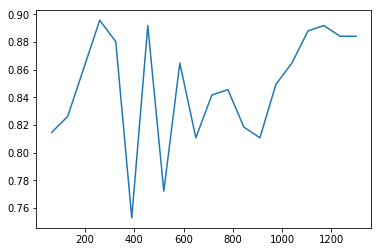

In [157]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

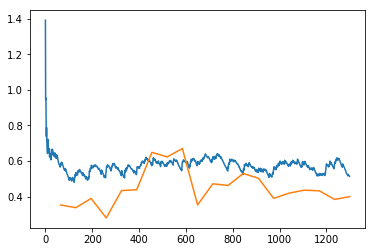

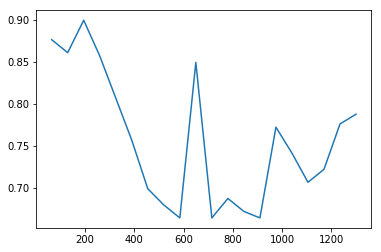

In [158]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [159]:
#Parameter settings 2

In [160]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.5
learning_rate=slice(1e-5,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['Suicide','Homicide'])
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_autopsy_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ num_folds  ))


SyntaxError: invalid syntax (<ipython-input-160-a1a8e455bcf4>, line 37)

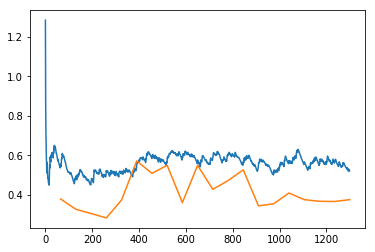

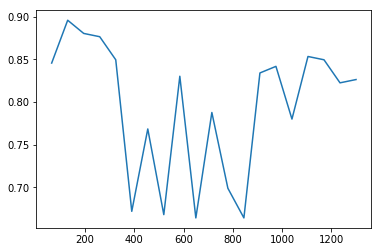

In [161]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

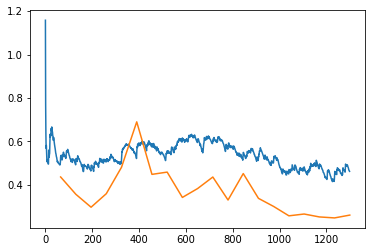

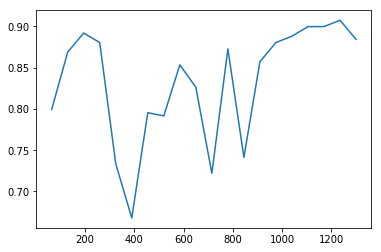

In [162]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

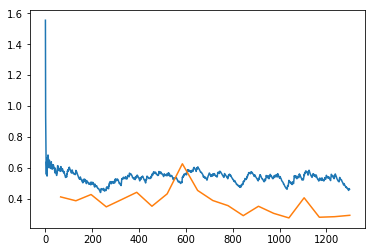

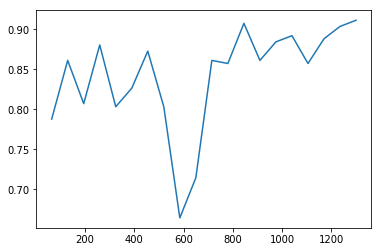

In [163]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

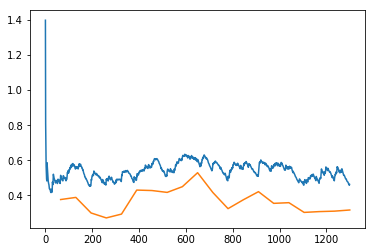

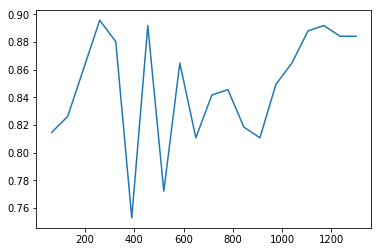

In [164]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

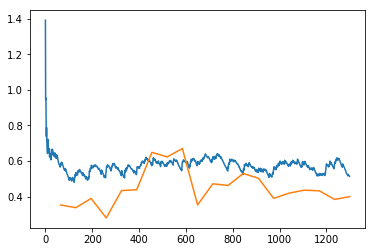

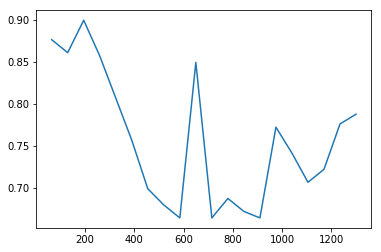

In [165]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [166]:
#Parameter settings 3

In [167]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate=slice(1e-4,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['Suicide','Homicide'])
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_autopsy_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ num_folds  ))


SyntaxError: invalid syntax (<ipython-input-167-1ba858708aa2>, line 37)

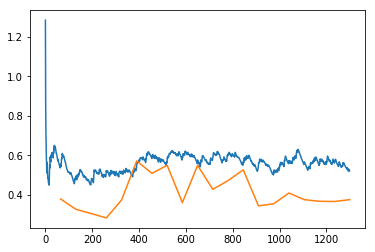

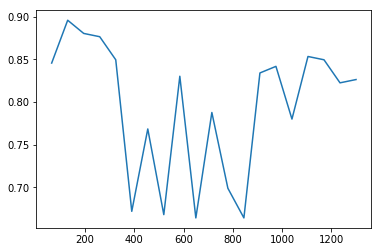

In [168]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

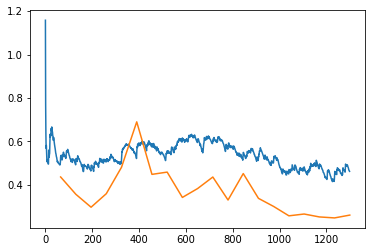

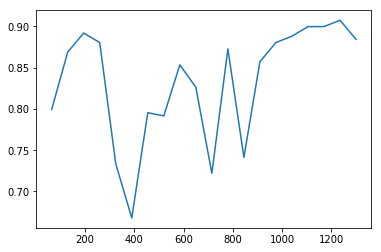

In [169]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

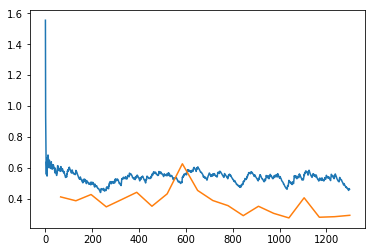

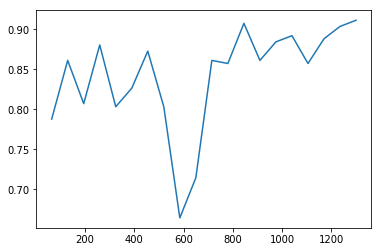

In [170]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

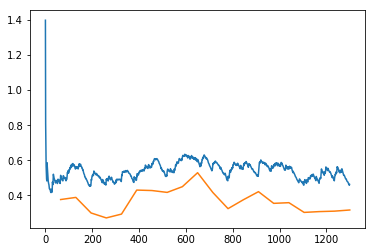

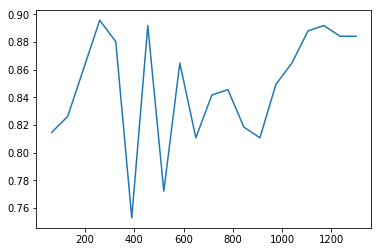

In [171]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

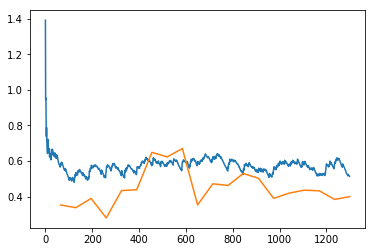

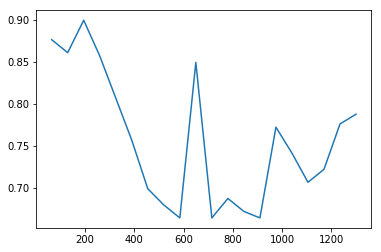

In [172]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [173]:
#Parameter settings 4

In [174]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate=slice(1e-4,1e-2)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['Suicide','Homicide'])
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_autopsy_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ num_folds  ))


SyntaxError: invalid syntax (<ipython-input-174-d4c2c6f9b0f1>, line 37)

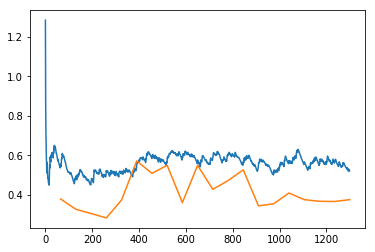

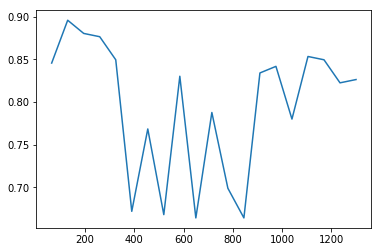

In [175]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

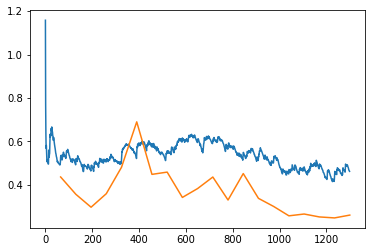

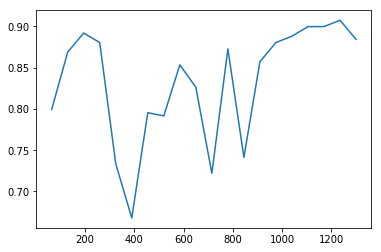

In [176]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

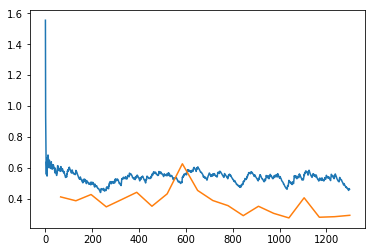

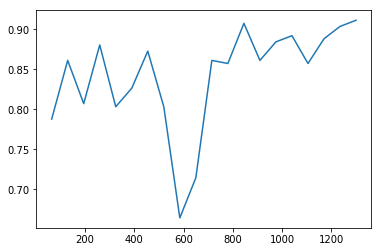

In [177]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

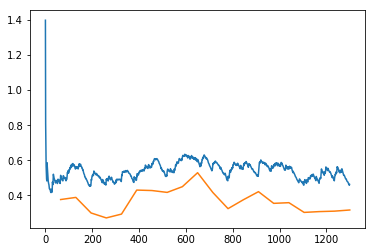

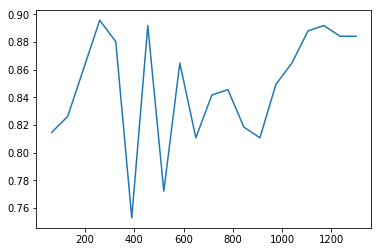

In [178]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

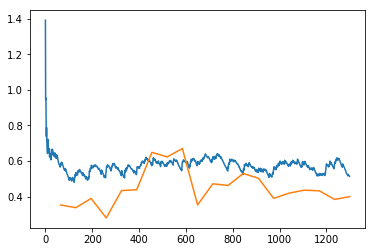

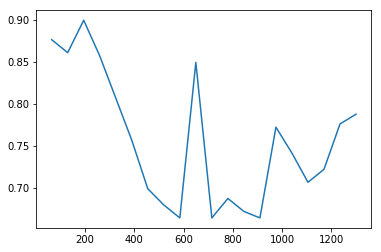

In [179]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [180]:
#Large RNN using an AWD LSTM activation (pretrained with WikiText and finetuned with the Nidia27k data)

In [181]:
#Parameter settings 1

In [182]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.1
learning_rate=slice(1e-5,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'documents-preprocess-valid.csv', classes=['neg','pos'])
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['neg','pos'])
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_nidia_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds))

Total time: 00:33
epoch  train_loss  valid_loss  accuracy
1      0.667443    0.487294    0.818533  (00:07)
2      0.597164    0.527278    0.725869  (00:08)
3      0.537376    0.456269    0.791506  (00:09)
4      0.484916    0.482581    0.795367  (00:09)



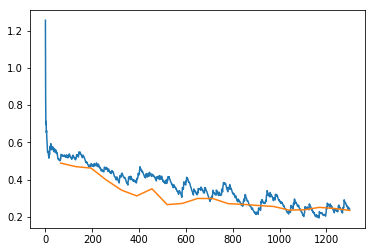

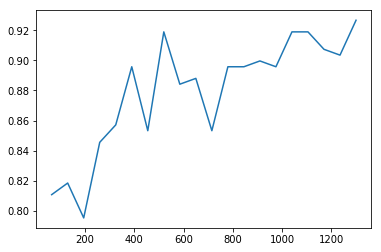

In [183]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

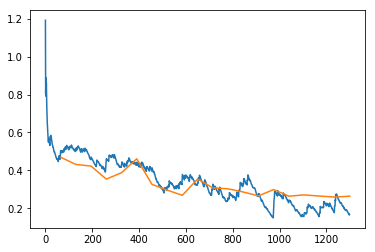

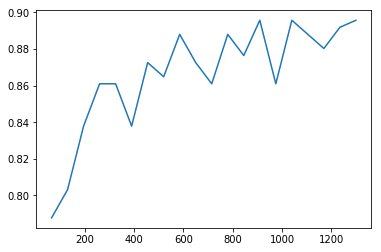

In [184]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

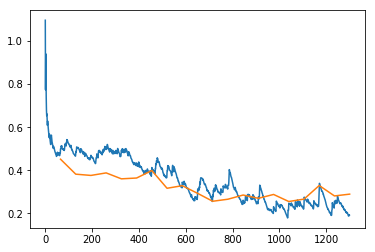

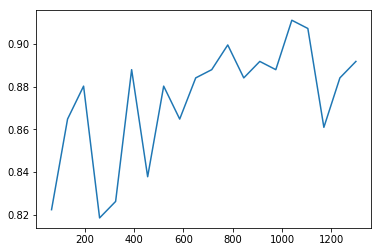

In [185]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

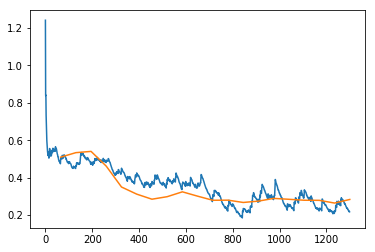

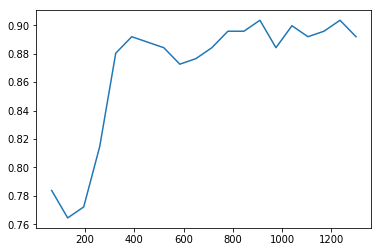

In [186]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

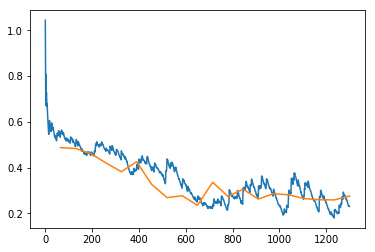

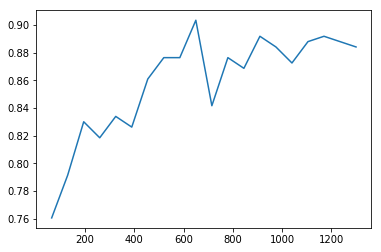

In [187]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [188]:
#Parameter settings 2

In [189]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.5
learning_rate=slice(1e-5,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'documents-preprocess-valid.csv', classes=['neg','pos'])
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['neg','pos'])
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_nidia_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds))

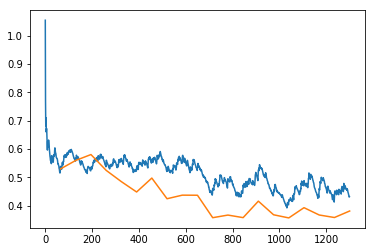

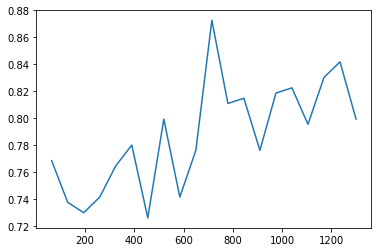

In [190]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

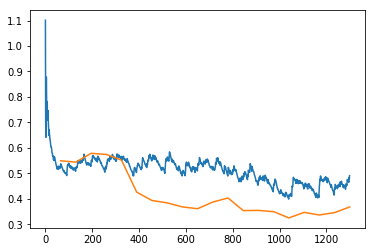

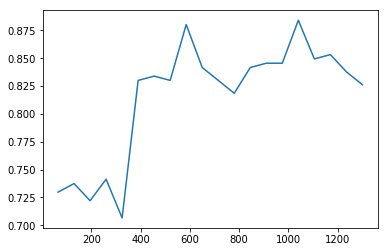

In [191]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

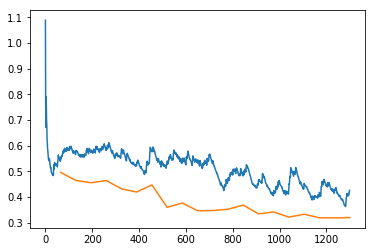

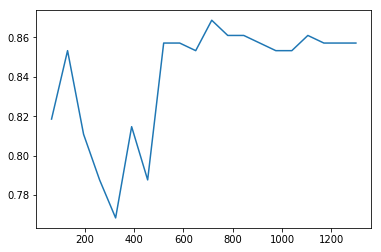

In [192]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

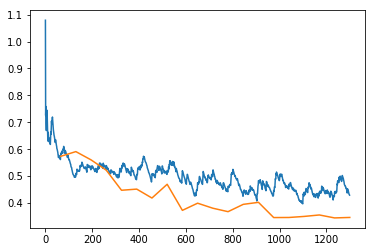

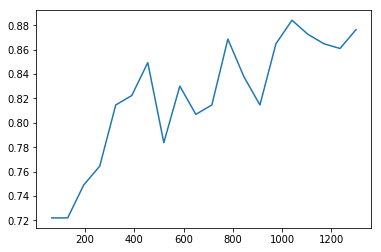

In [193]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

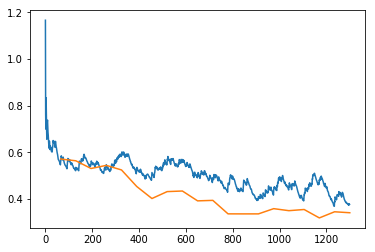

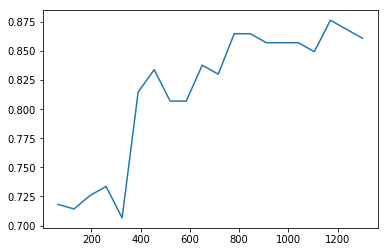

In [194]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [195]:
#Parameter settings 3

In [196]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.3
learning_rate=slice(1e-4,1e-3)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'documents-preprocess-valid.csv', classes=['neg','pos'])
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['neg','pos'])
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_nidia_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds))

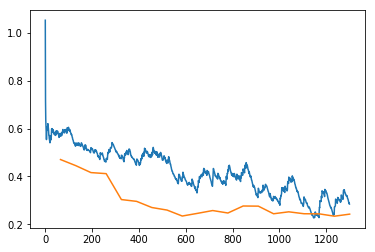

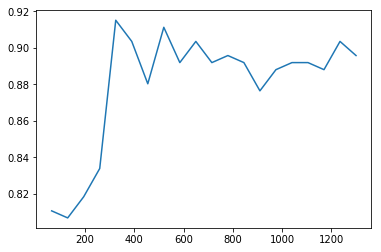

In [197]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

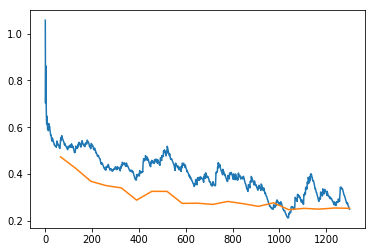

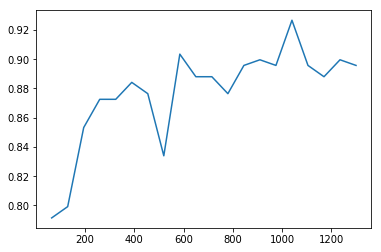

In [198]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

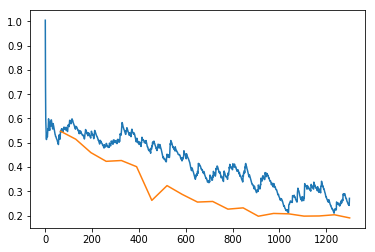

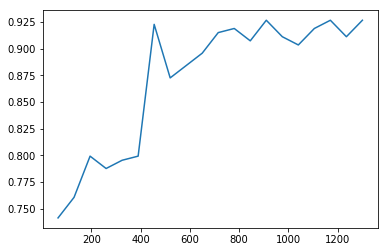

In [199]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

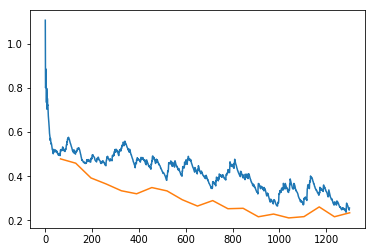

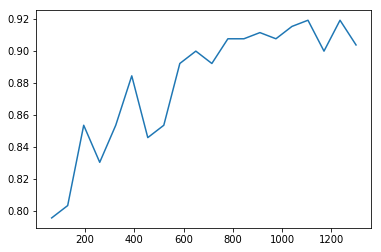

In [200]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

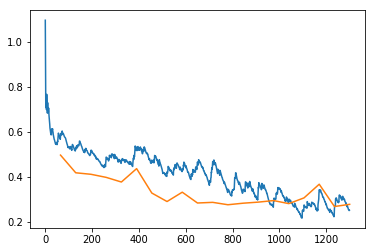

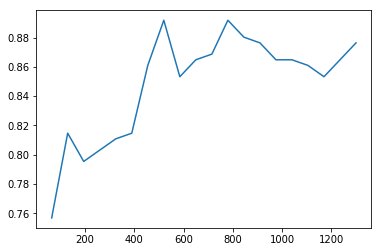

In [201]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()

In [202]:
#Parameter settings 4

In [203]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.3
learning_rate=slice(1e-4,1e-2)
wd=1e-4
num_folds = 5

moms = (0.8,0.7)
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']

accuracy_list = []
learner_list = []
i = 0
data_lm = TextLMDataBunch.from_csv(path_lm, 'documents-preprocess-valid.csv', classes=['neg','pos'])
for f in folds:
  i = i + 1
  print("\nFold: " + str(i))
  #data_lm = TextLMDataBunch.from_csv(path_lm, f, classes=['neg','pos'])
  data_clas = TextClasDataBunch.from_csv(path_clas,f, vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

  learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
  learn.load_encoder('enc_nidia_pretrained')
  learn.fit(4,learning_rate, wd=wd)
  learn.unfreeze()
  learn.fit_one_cycle(epochs,learning_rate, wd=wd, moms=moms)
  learner_list.append(learn)
  
  acc = (learn.validate())[1].item()
  accuracy_list.append(acc)

print('\nAccuracy List')
print(accuracy_list)

print("\nAverage Accuracy")
print( (sum(accuracy_list))/ (num_folds))

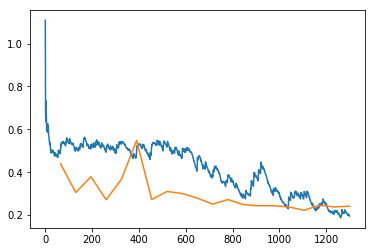

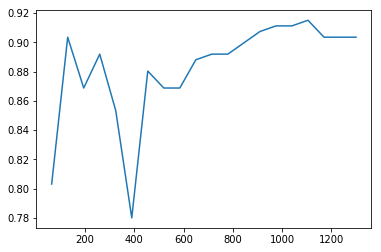

In [204]:
learner_list[0].recorder.plot_losses()
learner_list[0].recorder.plot_metrics()

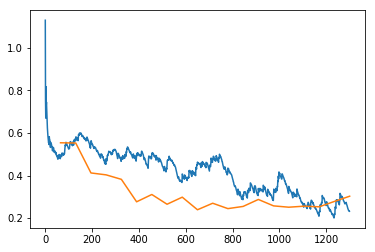

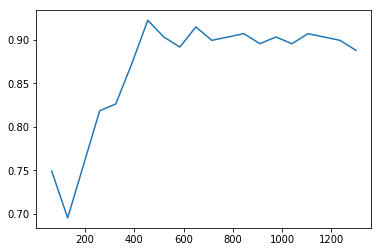

In [205]:
learner_list[1].recorder.plot_losses()
learner_list[1].recorder.plot_metrics()

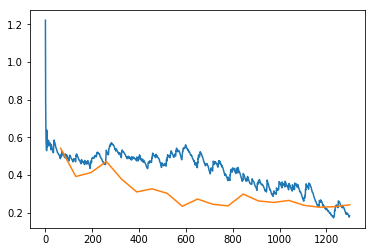

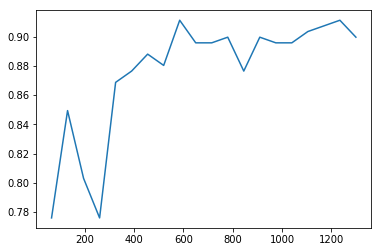

In [206]:
learner_list[2].recorder.plot_losses()
learner_list[2].recorder.plot_metrics()

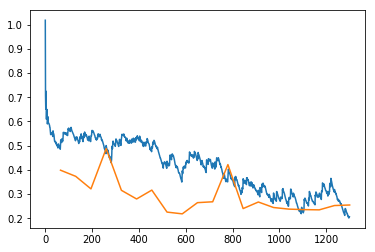

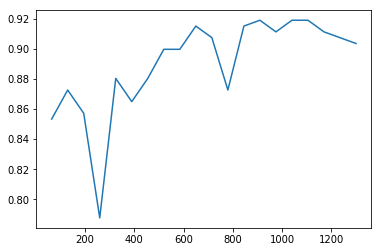

In [207]:
learner_list[3].recorder.plot_losses()
learner_list[3].recorder.plot_metrics()

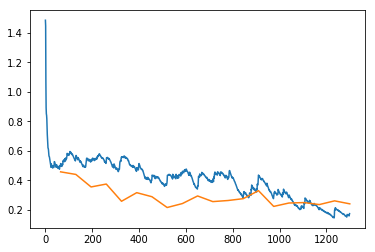

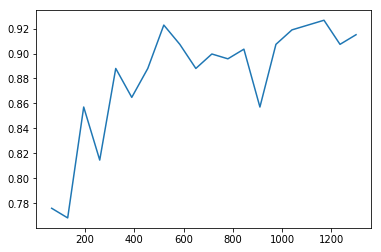

In [208]:
learner_list[4].recorder.plot_losses()
learner_list[4].recorder.plot_metrics()